# Get the genes overlapping the important tokens for ECOLI

In [1]:
import pandas as pd


pd.set_option("display.max_columns", None) # show all cols
pd.set_option('display.max_colwidth', None) # show full width of showing cols
pd.set_option("display.expand_frame_repr", False) # print cols side by side as it's supposed to be

## Read bed files containing tokens

In [2]:
import os
import pandas as pd
from pathlib import Path


bedDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'bed_files', 'ECOLI')

bedDfList = []
for bedFile in os.listdir(bedDir):
    tubeid = bedFile.split('.')[0].split('_')[0]
    tokensDf = pd.read_csv(Path(bedDir, bedFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score'])
    tokensDf['tube_id'] = tubeid
    bedDfList.append(tokensDf)

bedDf = pd.concat(bedDfList, ignore_index=True)
bedDf

,contig_id,start_position,end_position,tokens,score,tube_id
0,1,1,3,GAA,0.024555,AH21B049
1,1,4,12,AAACCCCGG,0.019281,AH21B049
2,1,13,17,TCAAT,0.042749,AH21B049
3,1,18,22,AAGGC,0.058446,AH21B049
4,1,23,27,CGGGG,-0.002272,AH21B049
...,...,...,...,...,...,...
247349726,5,259913,259920,GCTACCCG,0.012245,ALF22C077
247349727,5,259921,259928,TTGGTGTG,0.000125,ALF22C077
247349728,5,259929,259938,CCTGTTCCGT,-0.000540,ALF22C077
247349729,5,259939,259942,GGCC,0.024973,ALF22C077


## Calculate token lengths

In [3]:
bedDf['token_length'] = bedDf.tokens.apply(lambda x: len(x))
bedDf

,contig_id,start_position,end_position,tokens,score,tube_id,token_length
0,1,1,3,GAA,0.024555,AH21B049,3
1,1,4,12,AAACCCCGG,0.019281,AH21B049,9
2,1,13,17,TCAAT,0.042749,AH21B049,5
3,1,18,22,AAGGC,0.058446,AH21B049,5
4,1,23,27,CGGGG,-0.002272,AH21B049,5
...,...,...,...,...,...,...,...
247349726,5,259913,259920,GCTACCCG,0.012245,ALF22C077,8
247349727,5,259921,259928,TTGGTGTG,0.000125,ALF22C077,8
247349728,5,259929,259938,CCTGTTCCGT,-0.000540,ALF22C077,10
247349729,5,259939,259942,GGCC,0.024973,ALF22C077,4


## Calculate counts of token lengths

In [4]:
tokenlengthCountDf = bedDf.token_length.value_counts().reset_index().sort_values(by=['token_length'], ascending=True)
tokenlengthCountDf

,token_length,count
11,1,322207
9,2,1751088
7,3,8283051
6,4,13288147
4,5,25414480
0,6,60552510
1,7,45341597
2,8,34858185
3,9,33305012
5,10,17681732


## Plot counts of token lengths

<Axes: xlabel='token_length', ylabel='count'>

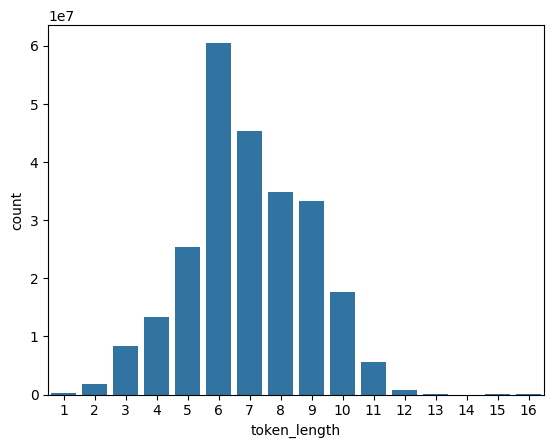

In [5]:
import seaborn as sns

sns.barplot(tokenlengthCountDf, x='token_length', y='count')

## Remove smaller tokens from this analysis

In [6]:
tokensDf = bedDf[bedDf.token_length > 7]
tokensDf

,contig_id,start_position,end_position,tokens,score,tube_id,token_length
1,1,4,12,AAACCCCGG,0.019281,AH21B049,9
5,1,28,37,TTTTTTGCAT,0.012053,AH21B049,10
7,1,41,50,AATTATTTGC,0.027107,AH21B049,10
12,1,72,80,CAGTTCTGT,0.022657,AH21B049,9
16,1,98,107,AATCAAATTA,0.017152,AH21B049,10
...,...,...,...,...,...,...,...
247349717,5,259854,259861,ATCGCTAA,0.012097,ALF22C077,8
247349723,5,259893,259900,GGTTTAGG,-0.010578,ALF22C077,8
247349726,5,259913,259920,GCTACCCG,0.012245,ALF22C077,8
247349727,5,259921,259928,TTGGTGTG,0.000125,ALF22C077,8


## Plot attribution score distribution

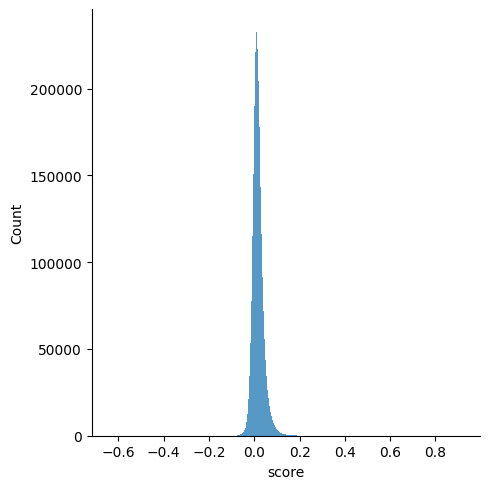

In [7]:
import seaborn as sns


sns.displot(tokensDf.score)

## Plot attribution score distribution (Zoomed)

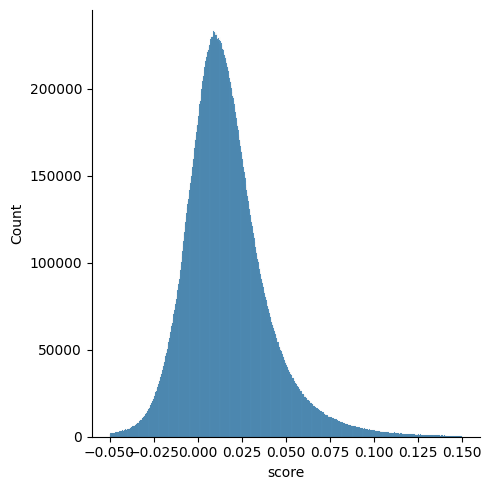

In [8]:
import seaborn as sns


sns.displot(tokensDf[(tokensDf.score > -0.05) & (tokensDf.score < 0.15)].score)

## Obtain the number of tokens whose attribution score is over the cut-off

In [9]:
signatureTokens = list(tokensDf.sort_values(by=['score'], ascending=False).tokens.unique()[:10])

len(signatureTokens)

10

## Display the top tokens whose attribution score is over the cut-off

In [10]:
signatureTokens

['TGACTTTAT',
 'AGATATAAA',
 'ACCAATCAA',
 'TGATTTTTG',
 'TCTGGATTTT',
 'CATCTGGCA',
 'ATCATTACC',
 'GTAGCTCAG',
 'CCTGAAAACC',
 'ATTCGTGA']

## Overlaps with annotations

### Read token overlaps with annotations

In [11]:
import os
import pandas as pd
from pathlib import Path


overlappingFilesDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'overlapping_with_annotations', 'ECOLI')

overlappingDfList = []
for overlappingFile in os.listdir(overlappingFilesDir):
    df = pd.read_csv(Path(overlappingFilesDir, overlappingFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score', 'feature_type', 'id', 'name', 'gene', 'atributes'])
    df['tube_code'] = [overlappingFile.split('_')[0]]*df.shape[0]
    overlappingDfList.append(df)
overlappingDf = pd.concat(overlappingDfList, ignore_index=True)
overlappingDf


,contig_id,start_position,end_position,tokens,score,feature_type,id,name,gene,atributes,tube_code
0,1,665,671,GAATCAT,0.037687,CDS,IGMLFD_00005,Uncharacterized deacetylase YaiS,yaiS,"ID=IGMLFD_00005;Name=Uncharacterized deacetylase YaiS;locus_tag=IGMLFD_00005;product=Uncharacterized deacetylase YaiS;Dbxref=COG:COG2120,COG:G,EC:3.-.-.-,GO:0016811,RefSeq:WP_000362014.1,SO:0001217,UniParc:UPI0000DACD3F,UniRef:UniRef100_A0A0D8VZB7,UniRef:UniRef50_P71311,UniRef:UniRef90_P71311;gene=yaiS",AH19C036
1,1,672,680,TTTATGAAT,0.023426,CDS,IGMLFD_00005,Uncharacterized deacetylase YaiS,yaiS,"ID=IGMLFD_00005;Name=Uncharacterized deacetylase YaiS;locus_tag=IGMLFD_00005;product=Uncharacterized deacetylase YaiS;Dbxref=COG:COG2120,COG:G,EC:3.-.-.-,GO:0016811,RefSeq:WP_000362014.1,SO:0001217,UniParc:UPI0000DACD3F,UniRef:UniRef100_A0A0D8VZB7,UniRef:UniRef50_P71311,UniRef:UniRef90_P71311;gene=yaiS",AH19C036
2,1,681,683,AAC,-0.010186,CDS,IGMLFD_00005,Uncharacterized deacetylase YaiS,yaiS,"ID=IGMLFD_00005;Name=Uncharacterized deacetylase YaiS;locus_tag=IGMLFD_00005;product=Uncharacterized deacetylase YaiS;Dbxref=COG:COG2120,COG:G,EC:3.-.-.-,GO:0016811,RefSeq:WP_000362014.1,SO:0001217,UniParc:UPI0000DACD3F,UniRef:UniRef100_A0A0D8VZB7,UniRef:UniRef50_P71311,UniRef:UniRef90_P71311;gene=yaiS",AH19C036
3,1,684,689,AAAACC,0.024358,CDS,IGMLFD_00005,Uncharacterized deacetylase YaiS,yaiS,"ID=IGMLFD_00005;Name=Uncharacterized deacetylase YaiS;locus_tag=IGMLFD_00005;product=Uncharacterized deacetylase YaiS;Dbxref=COG:COG2120,COG:G,EC:3.-.-.-,GO:0016811,RefSeq:WP_000362014.1,SO:0001217,UniParc:UPI0000DACD3F,UniRef:UniRef100_A0A0D8VZB7,UniRef:UniRef50_P71311,UniRef:UniRef90_P71311;gene=yaiS",AH19C036
4,1,690,698,TTCACCCAG,0.031550,CDS,IGMLFD_00005,Uncharacterized deacetylase YaiS,yaiS,"ID=IGMLFD_00005;Name=Uncharacterized deacetylase YaiS;locus_tag=IGMLFD_00005;product=Uncharacterized deacetylase YaiS;Dbxref=COG:COG2120,COG:G,EC:3.-.-.-,GO:0016811,RefSeq:WP_000362014.1,SO:0001217,UniParc:UPI0000DACD3F,UniRef:UniRef100_A0A0D8VZB7,UniRef:UniRef50_P71311,UniRef:UniRef90_P71311;gene=yaiS",AH19C036
...,...,...,...,...,...,...,...,...,...,...,...
92771815,5,357109,357119,CGGCAGACGAA,0.017858,CDS,KCGHAI_11840,Phage-related protein%2C tail assembly protein I,NaN,"ID=KCGHAI_11840;Name=Phage-related protein%2C tail assembly protein I;locus_tag=KCGHAI_11840;product=Phage-related protein%2C tail assembly protein I;Dbxref=COG:COG4723,COG:X,RefSeq:WP_000847668.1,SO:0001217,UniParc:UPI00016DBD2D,UniRef:UniRef100_A0A0A6RKN9,UniRef:UniRef50_F4V9K2,UniRef:UniRef90_A0A369FJA2",AH19F069
92771816,5,357120,357125,GGGGAT,0.030131,CDS,KCGHAI_11840,Phage-related protein%2C tail assembly protein I,NaN,"ID=KCGHAI_11840;Name=Phage-related protein%2C tail assembly protein I;locus_tag=KCGHAI_11840;product=Phage-related protein%2C tail assembly protein I;Dbxref=COG:COG4723,COG:X,RefSeq:WP_000847668.1,SO:0001217,UniParc:UPI00016DBD2D,UniRef:UniRef100_A0A0A6RKN9,UniRef:UniRef50_F4V9K2,UniRef:UniRef90_A0A369FJA2",AH19F069
92771817,5,357126,357131,GGTGGT,0.045921,CDS,KCGHAI_11840,Phage-related protein%2C tail assembly protein I,NaN,"ID=KCGHAI_11840;Name=Phage-related protein%2C tail assembly protein I;locus_tag=KCGHAI_11840;product=Phage-related protein%2C tail assembly protein I;Dbxref=COG:COG4723,COG:X,RefSeq:WP_000847668.1,SO:0001217,UniParc:UPI00016DBD2D,UniRef:UniRef100_A0A0A6RKN9,UniRef:UniRef50_F4V9K2,UniRef:UniRef90_A0A369FJA2",AH19F069
92771818,5,357132,357138,CAGGTTG,-0.022747,CDS,KCGHAI_11840,Phage-related protein%2C tail assembly protein I,NaN,"ID=KCGHAI_11840;Name=Phage-related protein%2C tail assembly protein I;locus_tag=KCGHAI_11840;product=Phage-related protein%2C tail assembly protein I;Dbxref=COG:COG4723,COG:X,RefSeq:WP_000847668.1,SO:0001217,UniParc:UPI00016DBD2D,UniRef:UniRef100_A0A0A6RKN9,UniRef:UniRef50_F4V9K2,UniRef:UniRef90_A0A369FJA2",AH19F069


### Get annotation overlaps for signature tokens

In [12]:
import pandas as pd


tokenOverlapsDfs = []
for signatureToken in signatureTokens:
    tokenOverlapsDf = overlappingDf[overlappingDf.tokens == signatureToken]
    tokenOverlapsDfs.append(tokenOverlapsDf)
finalTokenOverlapsDf = pd.concat(tokenOverlapsDfs, ignore_index=True)
finalTokenOverlapsDf

,contig_id,start_position,end_position,tokens,score,feature_type,id,name,gene,atributes,tube_code
0,3,53589,53597,TGACTTTAT,0.063945,CDS,IGMLFD_07130,DUF469 domain-containing protein,yggL,"ID=IGMLFD_07130;Name=DUF469 domain-containing protein;locus_tag=IGMLFD_07130;product=DUF469 domain-containing protein;Dbxref=COG:COG3171,COG:S,RefSeq:WP_001107565.1,SO:0001217,UniParc:UPI00005EF7AC,UniRef:UniRef100_A0A0D8VQJ7,UniRef:UniRef50_P38521,UniRef:UniRef90_A0A7I6Q5A9;gene=yggL",AH19C036
1,3,110425,110433,TGACTTTAT,0.056555,CDS,IGMLFD_07435,6-phospho-beta-glucosidase BglA,bglA,"ID=IGMLFD_07435;Name=6-phospho-beta-glucosidase BglA;locus_tag=IGMLFD_07435;product=6-phospho-beta-glucosidase BglA;Dbxref=BlastRules:WP_001336277,COG:COG2723,COG:G,EC:3.2.1.86,RefSeq:WP_001350137.1,SO:0001217,UniParc:UPI0000DACFAC,UniRef:UniRef100_A0A0D6H0I8,UniRef:UniRef50_Q46829,UniRef:UniRef90_A0A0W8AJZ7;gene=bglA",AH19C036
2,1,273044,273052,TGACTTTAT,0.044754,CDS,MMLIBF_01475,outer membrane lipoprotein chaperone LolA,lolA,"ID=MMLIBF_01475;Name=outer membrane lipoprotein chaperone LolA;locus_tag=MMLIBF_01475;product=outer membrane lipoprotein chaperone LolA;Dbxref=COG:COG2834,COG:M,GO:0042597,GO:0042953,GO:0044874,KEGG:K03634,RefSeq:WP_001295343.1,SO:0001217,UniParc:UPI000012E7AE,UniRef:UniRef100_A7ZJW0,UniRef:UniRef50_Q8Z813,UniRef:UniRef90_A4W8R5;gene=lolA",AH19C073
3,1,625373,625381,TGACTTTAT,0.085996,CDS,MMLIBF_03200,bacteriophage adsorption protein NfrA,nfrA,"ID=MMLIBF_03200;Name=bacteriophage adsorption protein NfrA;locus_tag=MMLIBF_03200;product=bacteriophage adsorption protein NfrA;Dbxref=BlastRules:WP_000662357,COG:COG5010,COG:UW,GO:0009279,GO:0046813,RefSeq:WP_001545839.1,SO:0001217,UniParc:UPI0001C2293A,UniRef:UniRef100_A0A641E6R4,UniRef:UniRef50_P31600,UniRef:UniRef90_P31600;gene=nfrA",AH19C073
4,1,38692,38700,TGACTTTAT,0.024407,CDS,MIIKGN_00235,putative tape measure protein,NaN,"ID=MIIKGN_00235;Name=putative tape measure protein;locus_tag=MIIKGN_00235;product=putative tape measure protein;Dbxref=RefSeq:WP_000807182.1,SO:0001217,UniParc:UPI0000043B67,UniRef:UniRef100_A0A0D6GQU2,UniRef:UniRef50_Q8SBG9,UniRef:UniRef90_Q8SBG9",AH19G061
...,...,...,...,...,...,...,...,...,...,...,...
17302,5,17610,17617,ATTCGTGA,0.018892,CDS,KCGHAI_09985,flagellar biosynthesis protein FlhB,flhB,"ID=KCGHAI_09985;Name=flagellar biosynthesis protein FlhB;locus_tag=KCGHAI_09985;product=flagellar biosynthesis protein FlhB;Dbxref=COG:COG1377,COG:N,GO:0005886,GO:0006935,GO:0009288,GO:0030254,GO:0030257,GO:0044780,GO:0071973,GO:0120102,RefSeq:WP_001278942.1,SO:0001217,UniParc:UPI00000DEC9C,UniRef:UniRef100_A0A233ZD18,UniRef:UniRef50_P76299,UniRef:UniRef90_P76299;gene=flhB",AH19F069
17303,5,33980,33987,ATTCGTGA,0.020912,CDS,KCGHAI_10070,putative transcriptional regulatory protein YebC,yebC,"ID=KCGHAI_10070;Name=putative transcriptional regulatory protein YebC;locus_tag=KCGHAI_10070;product=putative transcriptional regulatory protein YebC;Dbxref=RefSeq:WP_000907234.1,SO:0001217,UniParc:UPI00000D0486,UniRef:UniRef100_P67176,UniRef:UniRef90_P0A8A0;gene=yebC",AH19F069
17304,5,67790,67797,ATTCGTGA,0.033017,CDS,KCGHAI_10265,carboxy terminal-processing peptidase,prc,"ID=KCGHAI_10265;Name=carboxy terminal-processing peptidase;locus_tag=KCGHAI_10265;product=carboxy terminal-processing peptidase;Dbxref=COG:COG0793,COG:O,EC:3.4.21.102,GO:0004175,GO:0004252,GO:0005886,GO:0006508,GO:0007165,GO:0030288,RefSeq:WP_001055794.1,SO:0001217,UniParc:UPI00000E4A15,UniRef:UniRef100_A0A061YGM2,UniRef:UniRef50_P23865,UniRef:UniRef90_P23865;gene=prc",AH19F069
17305,5,270103,270110,ATTCGTGA,0.037157,CDS,KCGHAI_11320,adenosine deaminase,add,"ID=KCGHAI_11320;Name=adenosine deaminase;locus_tag=KCGHAI_11320;product=adenosine deaminase;Dbxref=COG:COG1816,COG:F,EC:3.5.4.4,GO:0004000,GO:0008270,GO:0009117,GO:0009168,GO:0046936,RefSeq:WP_000567511.1,SO:0001217,UniParc:UPI00000DEBDD,UniRef:UniRef100_B7M9X6,UniRef:UniRef50_Q8ZPL9,UniRef:UniRef90_Q8X661;gene=add",AH19F069


### Explore annotation overlaps for signature tokens

In [13]:
overlapCountsDf = finalTokenOverlapsDf.groupby(by=['tokens', 'name', 'feature_type']).agg({'contig_id': 'count'}).reset_index().sort_values(by='contig_id', ascending=False)
overlapCountsDf

,tokens,name,feature_type,contig_id
515,CATCTGGCA,molybdenum ABC transporter ATP-binding protein ModC,CDS,154
215,ATTCGTGA,6-phospho-beta-glucosidase,CDS,152
337,ATTCGTGA,aldose sugar dehydrogenase YliI,CDS,151
348,ATTCGTGA,catalase HPII,CDS,151
637,GTAGCTCAG,tRNA-Val(gac),tRNA,146
...,...,...,...,...
25,ACCAATCAA,Phage protein,CDS,1
26,ACCAATCAA,Phage tail protein,CDS,1
27,ACCAATCAA,Phosphoenolpyruvate--protein phosphotransferase,CDS,1
289,ATTCGTGA,PhzF family isomerase,CDS,1


### Save annotation overlaps for signature tokens

In [14]:
import os

from pathlib import Path


overlapCountsDf.to_csv(Path(os.environ['GENOMICS_DATA_BASE'], 'survival_analysis', 'ECOLI', 'annotation_overlap_counts_tl7.csv'), index=False)